# C2 M2 Exp NN Basic
**Course**: Course 2 (Master Class)
**Workflow**: `data-notebook-refiner`

---


In [1]:
import matplotlib.pyplot as plt
# 🔧 Setup & Imports
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim


## 1. 🏗️ 아키텍처: 다층 퍼셉트론 (MLP)
숫자 이미지를 분류하기 위한 Feed-Forward 신경망을 구축합니다.

*   **Input Layer**: 64개 뉴런 (8x8 픽셀 Flatten)
*   **Hidden Layer**: 32개 뉴런 + **ReLU** 활성화 함수
*   **Output Layer**: 10개 뉴런 (0~9 클래스)


In [2]:
# 데이터 로드
digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 텐서 변환
X_train_t = torch.FloatTensor(X_train)
y_train_t = torch.LongTensor(y_train)
X_test_t = torch.FloatTensor(X_test)
y_test_t = torch.LongTensor(y_test)


In [3]:
# 모델 정의
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(64, 32)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32, 10)
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        return self.fc2(x)

model = SimpleMLP()
print(model)


SimpleMLP(
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=32, out_features=10, bias=True)
)


## 2. 🏋️ 학습 및 Loss 모니터링
매 Epoch마다 Loss를 기록하여 학습이 잘 되고 있는지 확인합니다.


In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
losses = []

for epoch in range(200):
    optimizer.zero_grad()
    outputs = model(X_train_t)
    loss = criterion(outputs, y_train_t)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    
    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')


Epoch 0, Loss: 2.9395
Epoch 50, Loss: 0.0411
Epoch 100, Loss: 0.0119
Epoch 150, Loss: 0.0055


## 3. 📉 시각화: 학습 곡선 (Learning Curve)
Loss가 0에 가깝게 줄어드는 하향 곡선이어야 정상입니다.


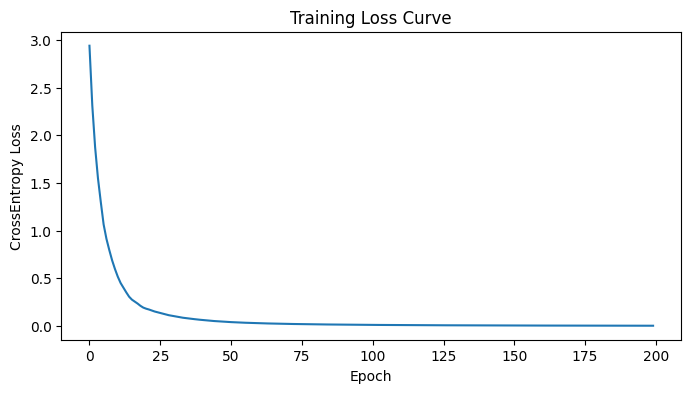

In [5]:
plt.figure(figsize=(8, 4))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('CrossEntropy Loss')
plt.title('Training Loss Curve')
plt.show()


## 4. ✅ 성능 평가
Test Set을 이용해 최종 정확도(Accuracy)를 측정합니다.


In [6]:
with torch.no_grad():
    test_outputs = model(X_test_t)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == y_test_t).sum().item() / y_test_t.size(0)

print(f'Test Accuracy: {accuracy*100:.2f}%')


Test Accuracy: 97.78%



---
## 📝 핵심 요약 및 인사이트
*   **무엇을 배웠나요?**
    *   (여기에 핵심 배운 점을 기록하세요)
*   **다음 단계**:
    *   (다음 학습 단계)
